In [1]:
# Exploratory Data Analysis (EDA) for Loan Default Prediction
#This notebook explores the dataset to uncover patterns, detect anomalies, and derive insights to guide preprocessing and modeling.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the dataset
df =pd.read_csv('loan_default_prediction_project.csv')
df.head()

Age  Gender        Income Employment_Status  Location  Credit_Score  \
0   56    Male  71266.105175          Employed  Suburban           639   
1   46     NaN  37283.054601          Employed  Suburban           474   
2   32    Male  69567.036392          Employed     Urban           750   
3   60  Female  72016.087392          Employed     Rural           435   
4   25  Female  32161.988250        Unemployed  Suburban           315   

   Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0              0.007142           27060.188289  Non-Default  13068.330587   
1              0.456731           40192.994312      Default  15159.338369   
2              0.329231           25444.262759      Default   6131.287659   
3              0.052482            3122.213749  Non-Default  37531.880251   
4              0.450236           19197.350445  Non-Default  41466.397989   

   Interest_Rate  Loan_Duration_Months  
0      18.185533                    59  
1      11.727471                    69  
2      17.030462                    69  
3      16.868949                    26  
4      18.891582                    66

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print('Missing Values')
print(missing_values)
print(' ')
print('Missing Value Percentage')
print(missing_percentage)

Missing Values
Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64
 
Missing Value Percentage
Age                       0.0
Gender                   20.8
Income                    0.0
Employment_Status         9.4
Location                  0.0
Credit_Score              0.0
Debt_to_Income_Ratio      0.0
Existing_Loan_Balance     0.0
Loan_Status               0.0
Loan_Amount               0.0
Interest_Rate             0.0
Loan_Duration_Months      0.0
dtype: float64


In [6]:
# Summary of numerical features
df.describe().T

count          mean           std           min  \
Age                    1000.0     40.986000     13.497852     18.000000   
Income                 1000.0  60705.291386  24594.030383  20010.775440   
Credit_Score           1000.0    571.094000    163.395983    250.000000   
Debt_to_Income_Ratio   1000.0      0.485502      0.296466      0.000628   
Existing_Loan_Balance  1000.0  25239.656186  14202.689890     80.059377   
Loan_Amount            1000.0  27636.369345  12925.200961   5060.998602   
Interest_Rate          1000.0     11.538267      4.883342      3.003148   
Loan_Duration_Months   1000.0     42.221000     17.116867     12.000000   

                                25%           50%           75%            max  
Age                       29.000000     42.000000     52.000000      64.000000  
Income                 40820.367273  60547.119929  80338.552791  150000.000000  
Credit_Score             429.000000    567.000000    720.250000     849.000000  
Debt_to_Income_Ratio       0.220606      0.483633      0.735476       0.999849  
Existing_Loan_Balance  13597.494593  25439.429898  37305.466739   49987.578171  
Loan_Amount            16756.405848  27938.066858  39151.564233   49986.843702  
Interest_Rate              7.483547     11.537942     15.499129      19.991438  
Loan_Duration_Months      27.000000     42.000000     57.000000      71.000000

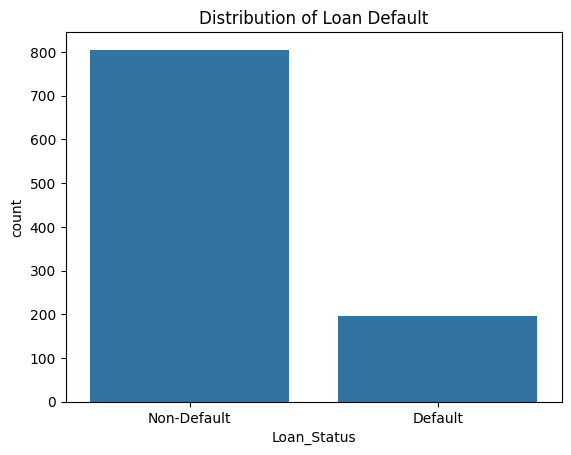

Loan_Status
Non-Default    80.5
Default        19.5
Name: proportion, dtype: float64


In [20]:
# Target variable distribution
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Default')
plt.savefig('Distribution of Loan Default.jpg')
plt.show()

# Percentage distribution
print(df['Loan_Status'].value_counts(normalize=True) * 100)

In [8]:
# The following visualization highlights the imbalance in the target variable. Note that class imbalance may bias the model towards the majority class.
# This imbalance will influence the choice of metrics like F1-score and Recall and necessitate strategies such as oversampling, undersampling, or class weighting

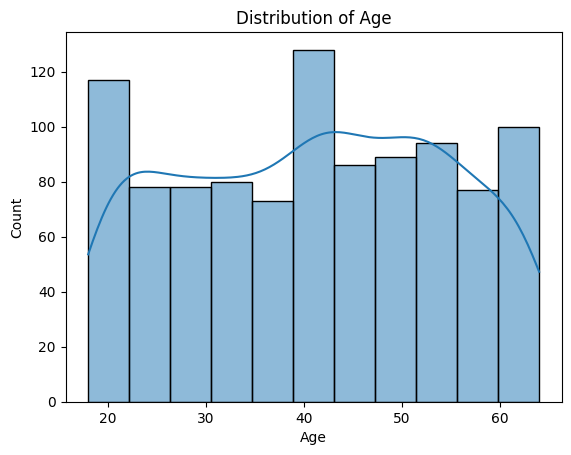

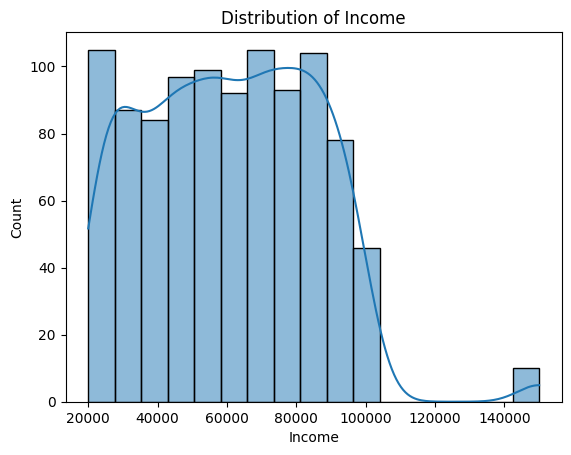

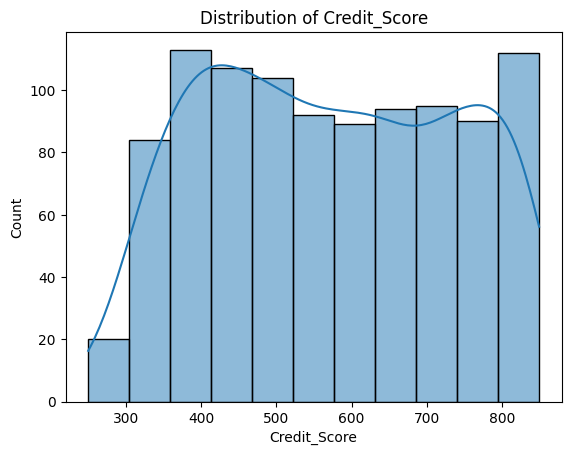

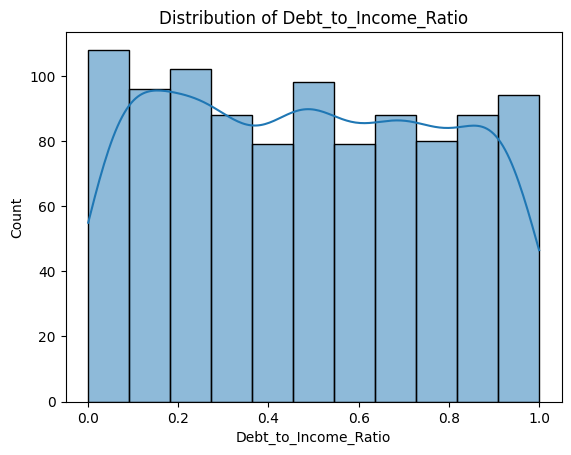

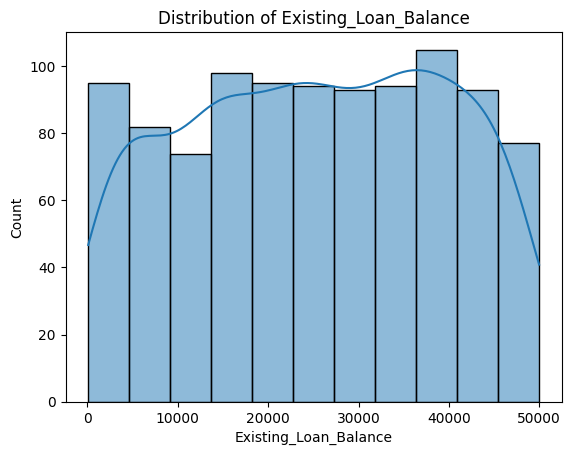

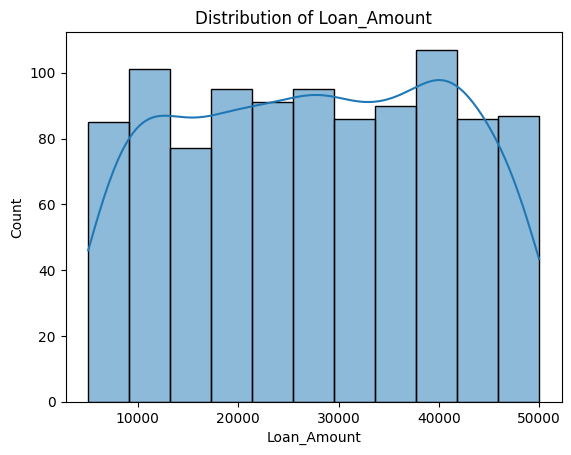

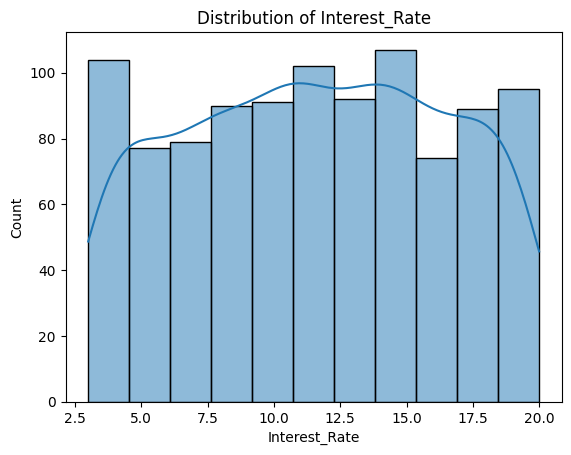

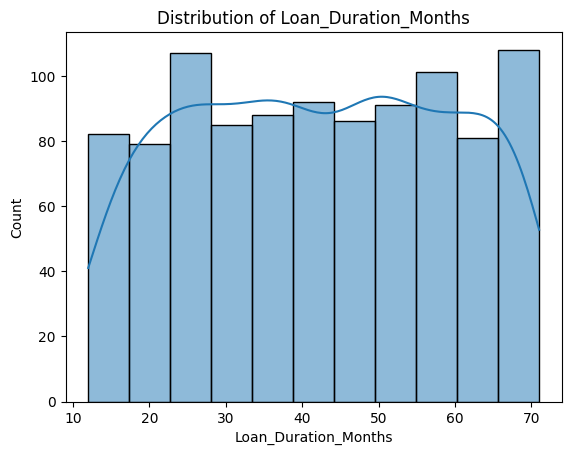

In [9]:
#Distribution of Numerical Features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

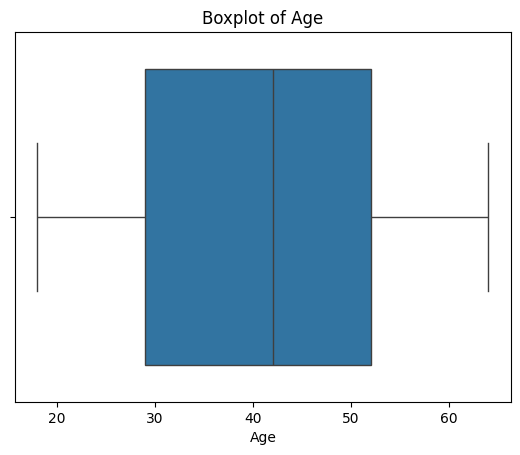

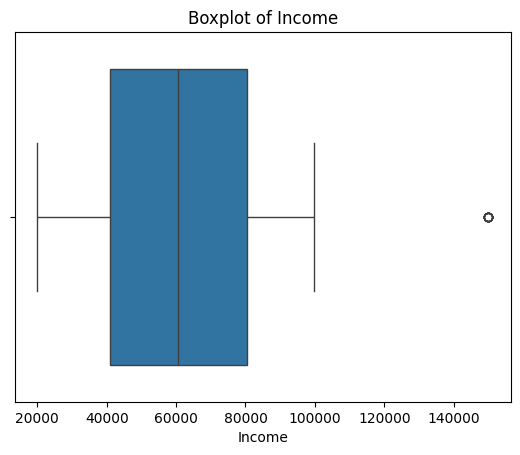

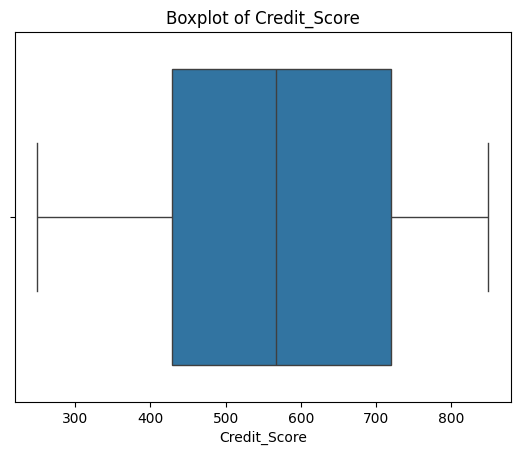

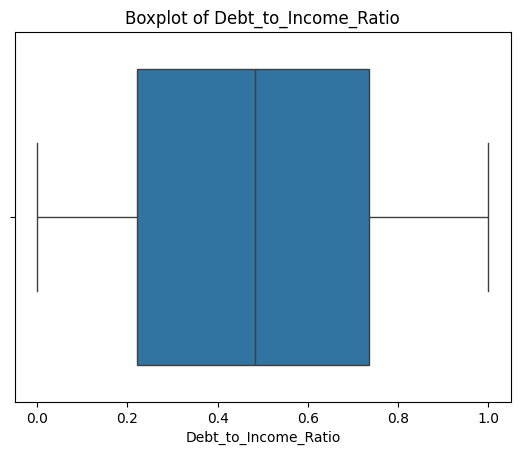

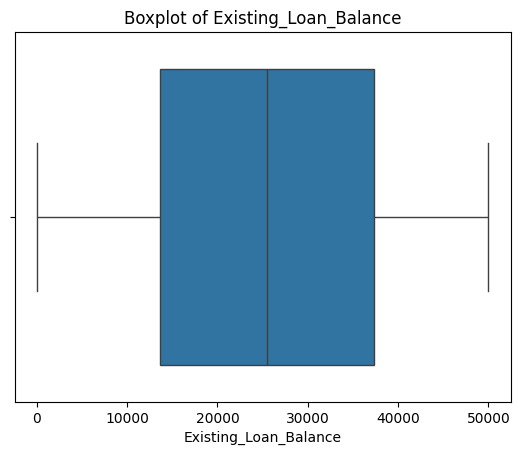

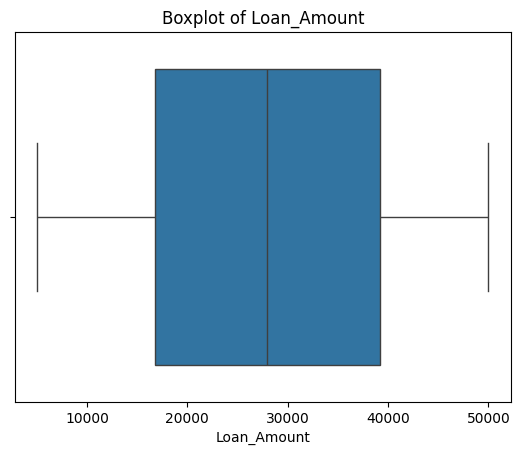

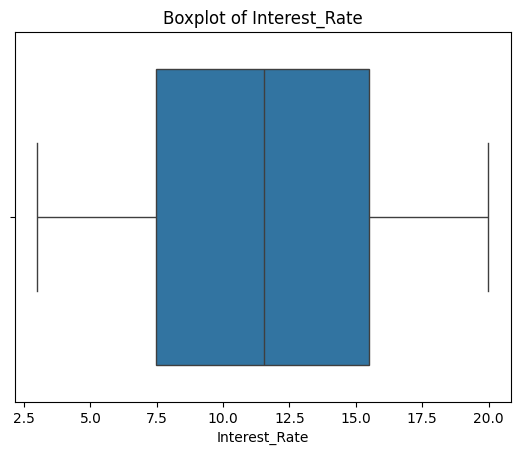

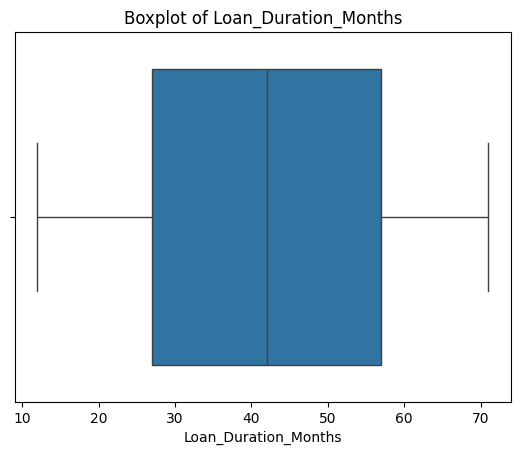

In [10]:
#Use boxplots to detect outliers:
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [11]:
# Key Insights: Observations on Outliers and Skewness
# 'Income' shows significant outliers , as observed in the boxplot.
#These outliers might represent extreme cases that could impact the model.

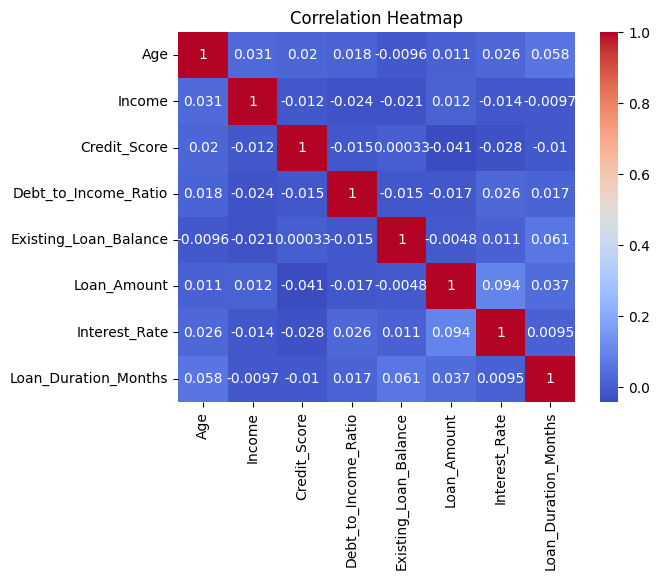

In [22]:
# Correlation Analysis
correlation = df[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.jpg')
plt.show()

In [13]:
#Most features show weak correlations, indicating minimal multicollinearity, which reduces the need for feature elimination based on correlation alone.

In [14]:
#Summarize categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n", df[col].value_counts())
    print(' ')


Value counts for Gender:
 Gender
Female    399
Male      393
Name: count, dtype: int64
 
Value counts for Employment_Status:
 Employment_Status
Employed      596
Unemployed    310
Name: count, dtype: int64
 
Value counts for Location:
 Location
Rural       348
Suburban    344
Urban       308
Name: count, dtype: int64
 
Value counts for Loan_Status:
 Loan_Status
Non-Default    805
Default        195
Name: count, dtype: int64
 



Default Rate by Gender:
 Gender
Female    399
Male      393
Name: Loan_Status, dtype: int64


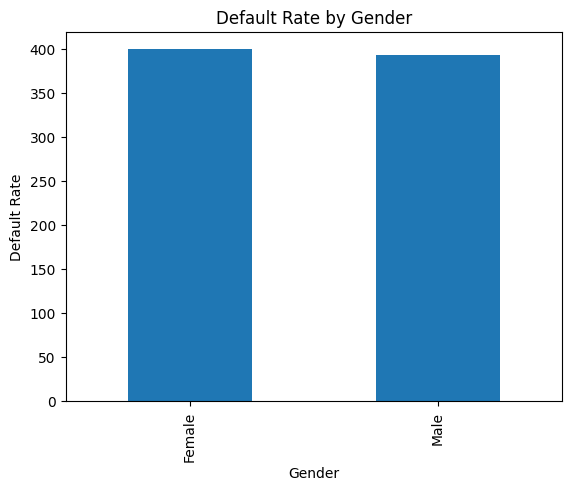


Default Rate by Employment_Status:
 Employment_Status
Employed      596
Unemployed    310
Name: Loan_Status, dtype: int64


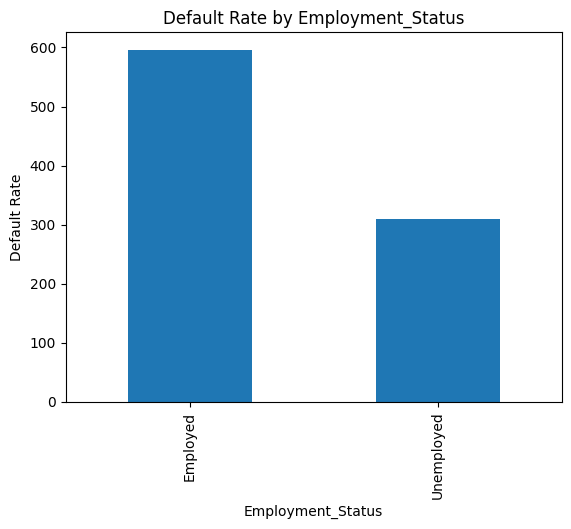


Default Rate by Location:
 Location
Rural       348
Suburban    344
Urban       308
Name: Loan_Status, dtype: int64


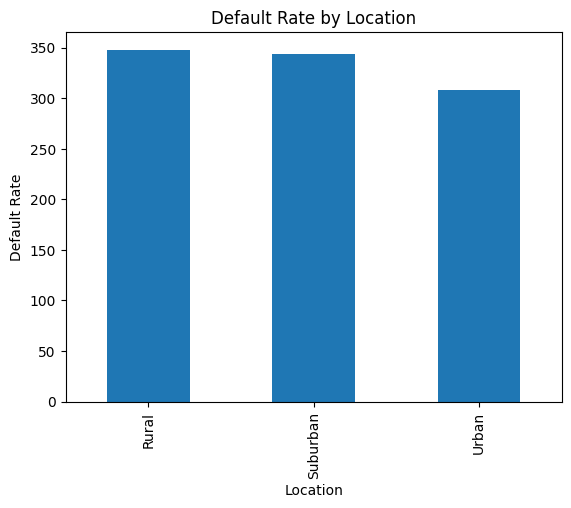


Default Rate by Loan_Status:
 Loan_Status
Default        195
Non-Default    805
Name: Loan_Status, dtype: int64


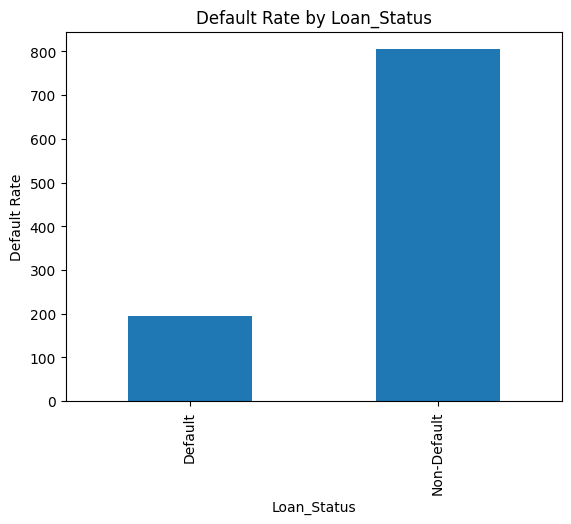

In [15]:
#Analyze the relationship between categorical variables and the target
for col in categorical_columns:
    default_rate = df.groupby(col)['Loan_Status'].count()
    print(f"\nDefault Rate by {col}:\n", default_rate)

    # Visualize
    default_rate.plot(kind='bar')
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.show()


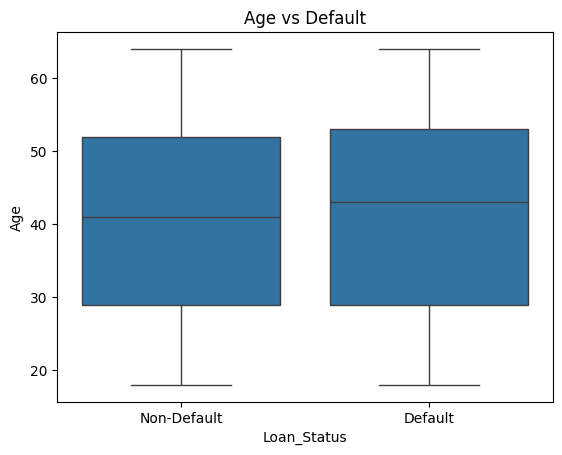

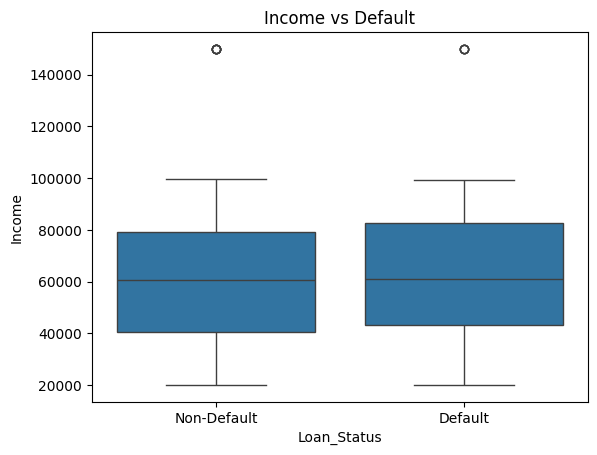

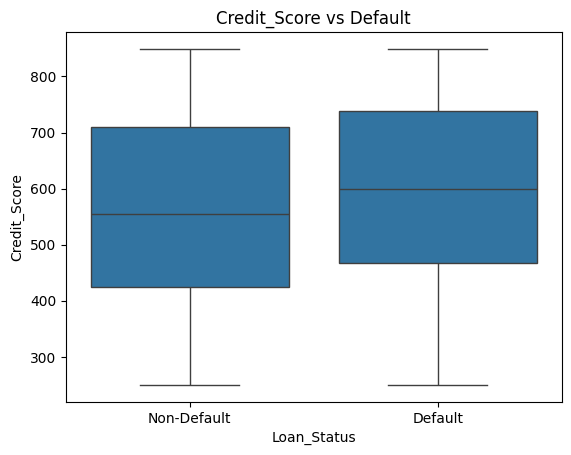

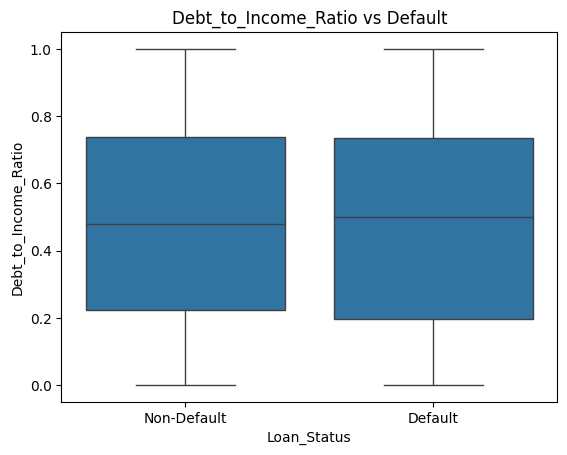

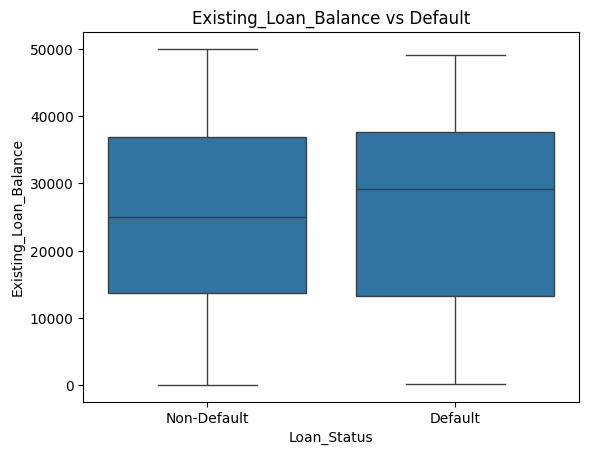

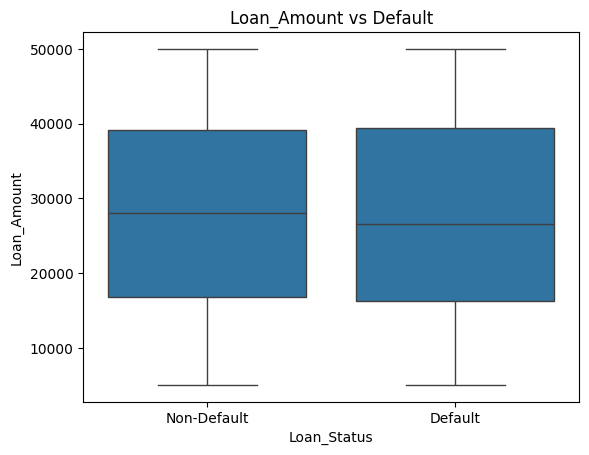

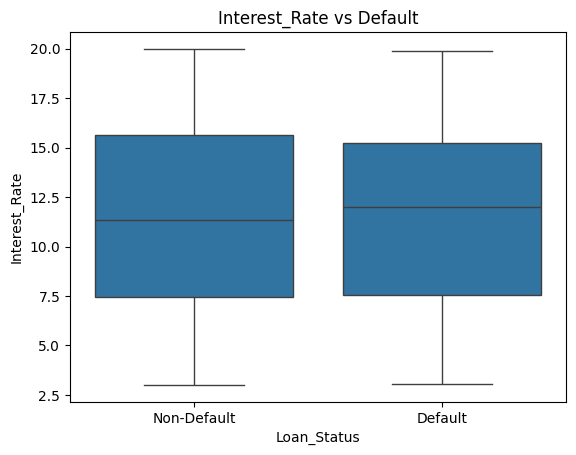

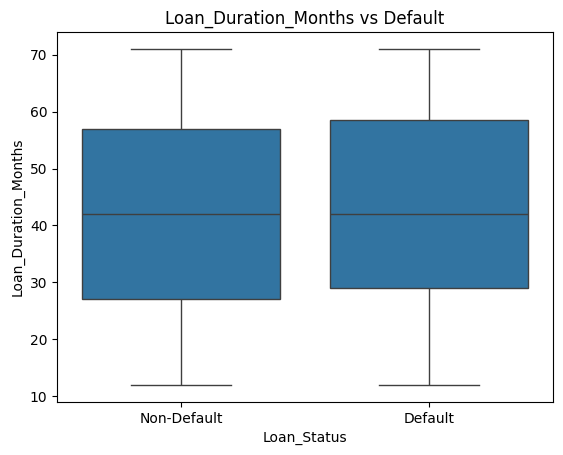

In [16]:
# Numerical Features vs. Target

for col in numerical_columns:
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs Default')
    plt.show()


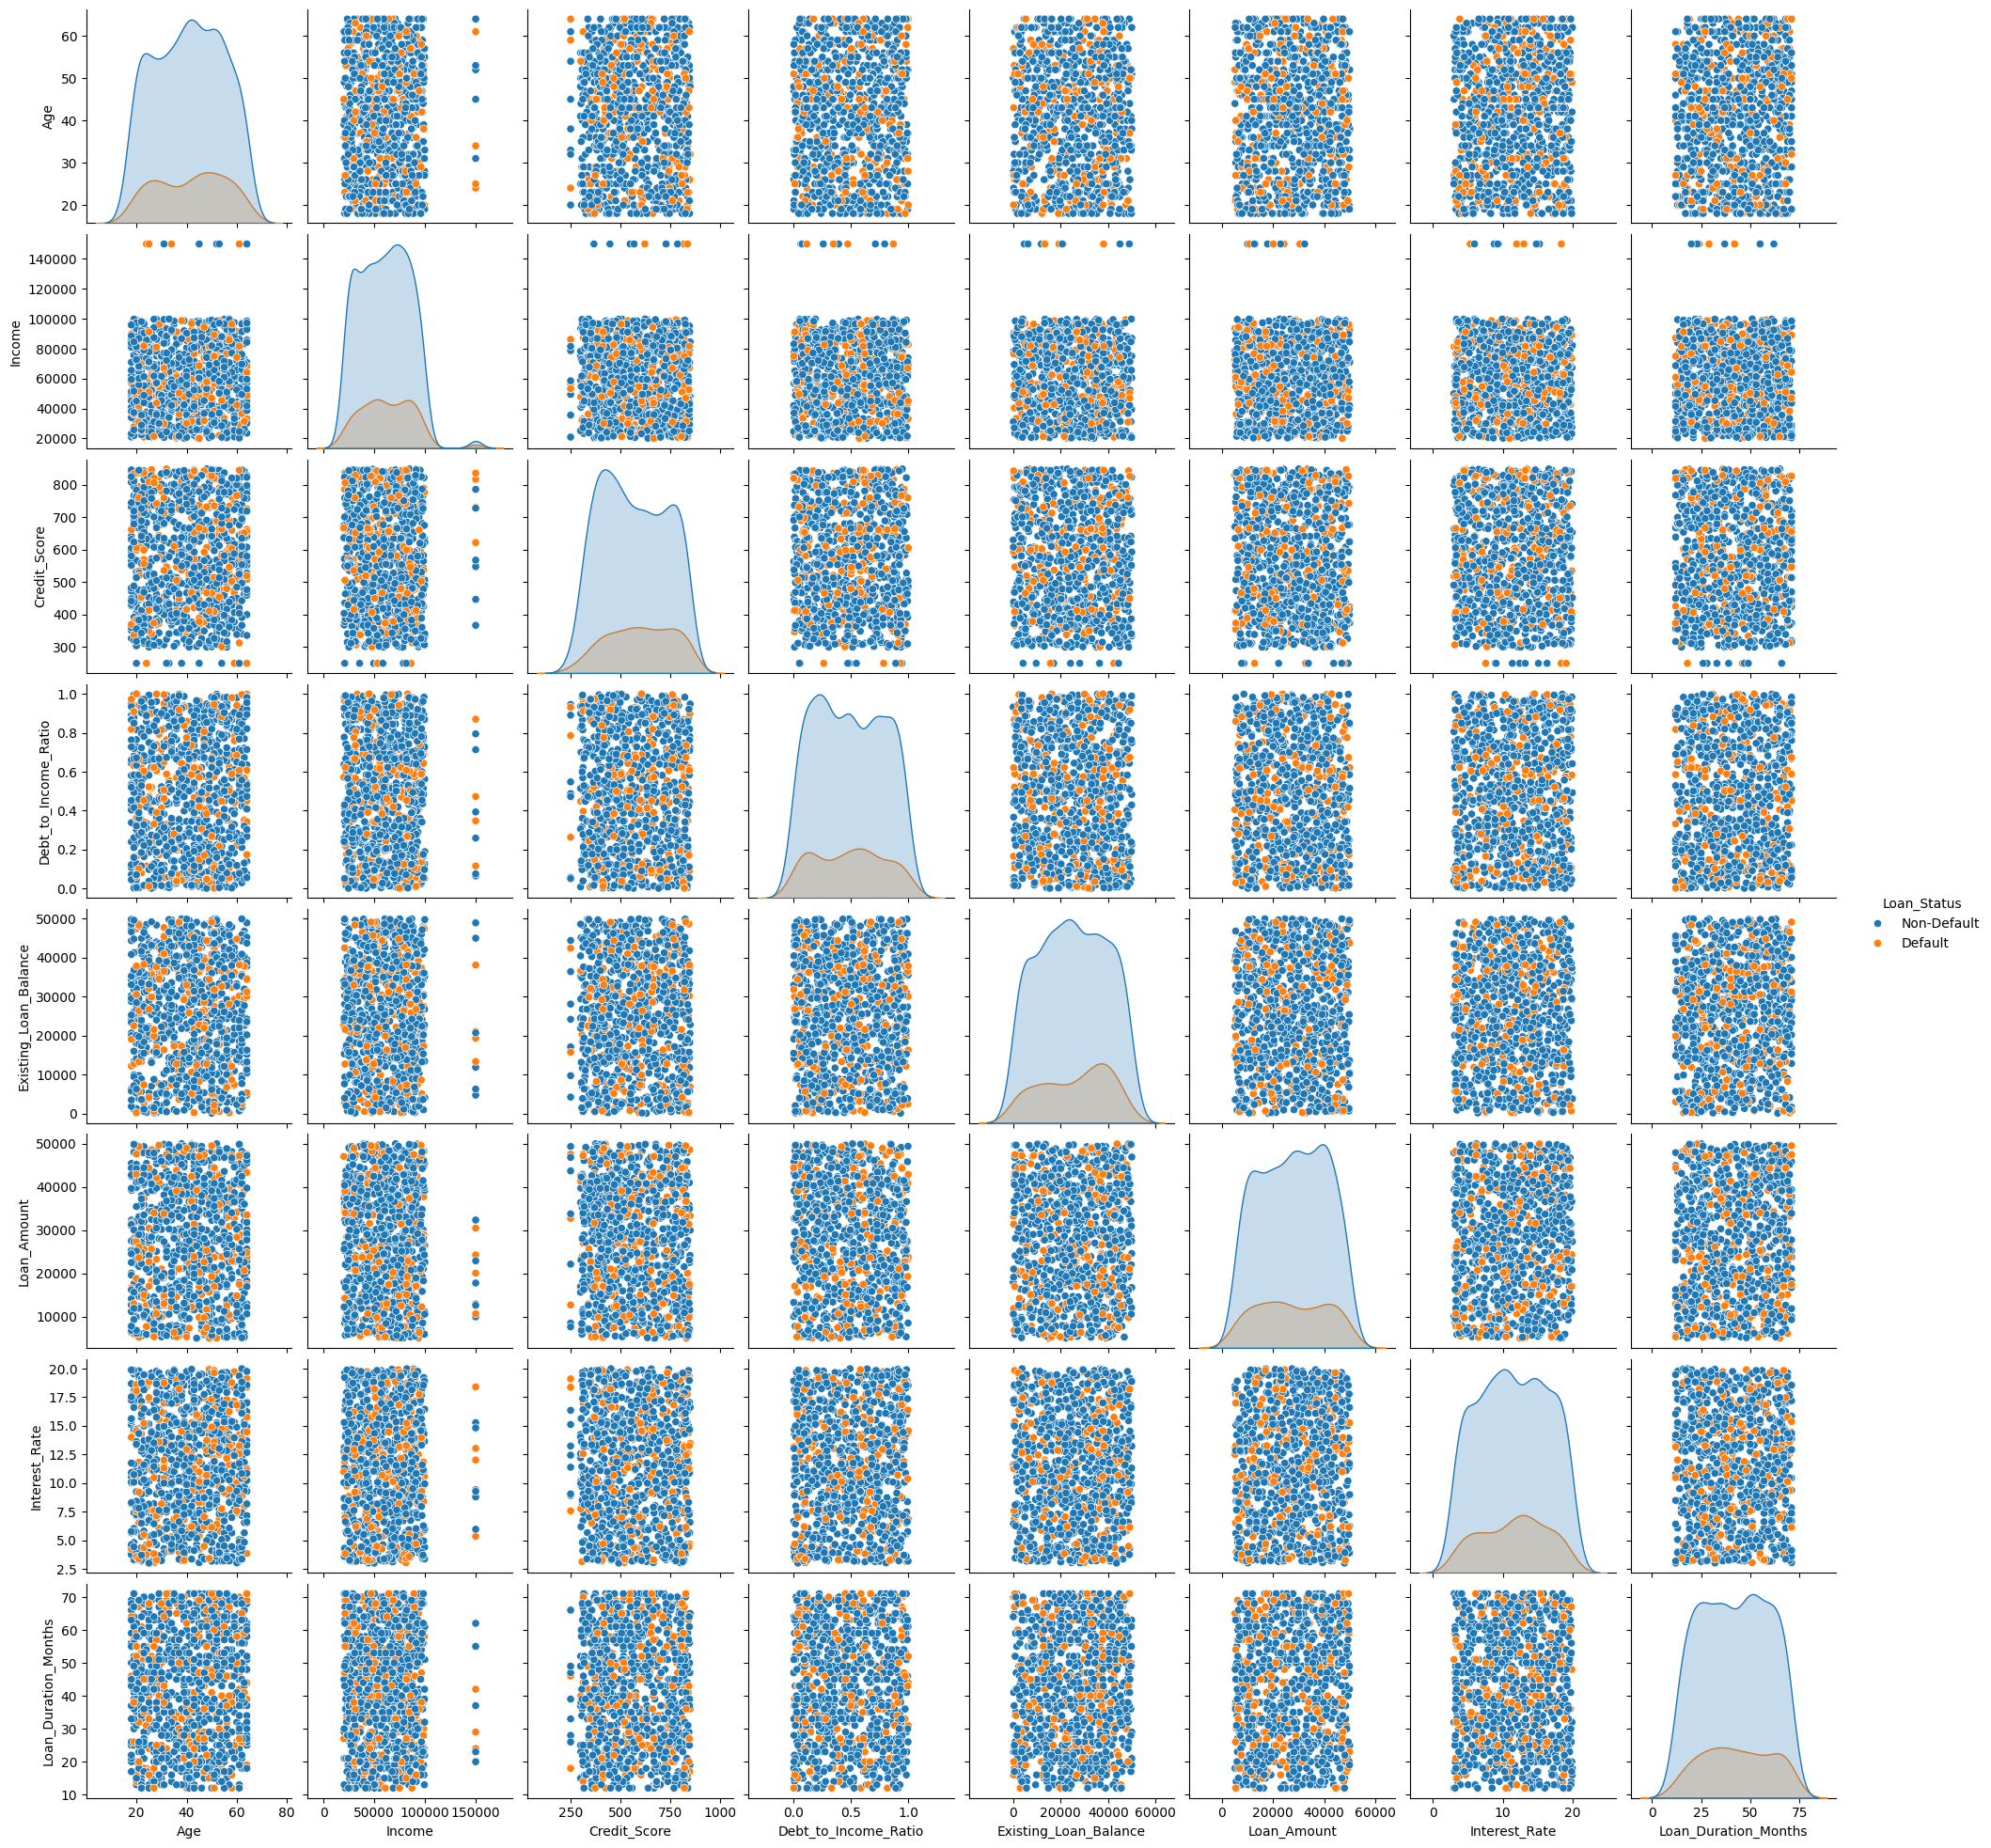

In [17]:
sns.pairplot(df, hue='Loan_Status', vars=numerical_columns)
plt.show()


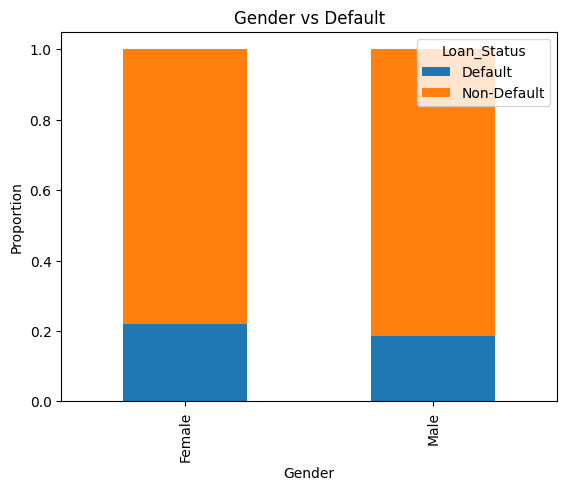

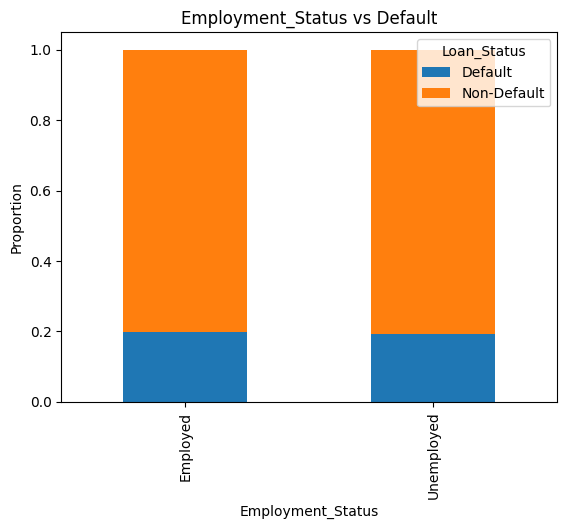

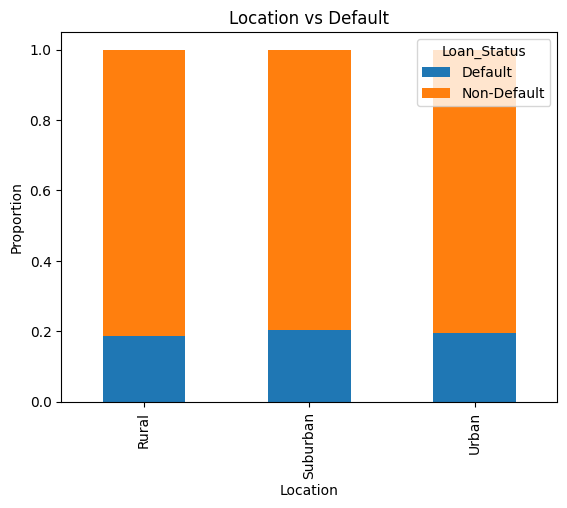

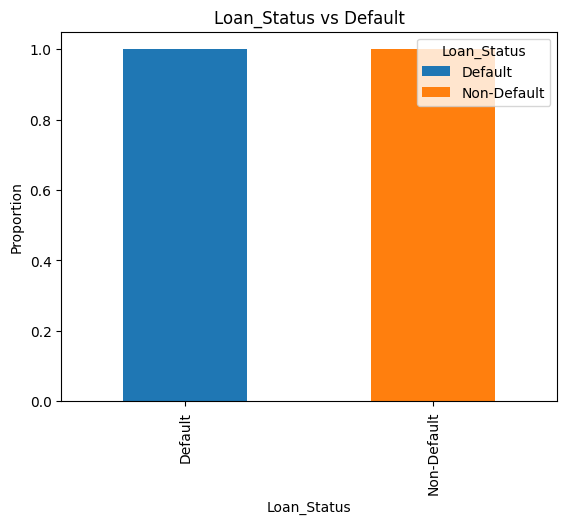

In [18]:
#Categorical Features vs. Target
for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df['Loan_Status'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Default')
    plt.ylabel('Proportion')
    plt.show()


In [19]:
 correlation

Age    Income  Credit_Score  Debt_to_Income_Ratio  \
Age                    1.000000  0.031464      0.020273              0.017853   
Income                 0.031464  1.000000     -0.011904             -0.023798   
Credit_Score           0.020273 -0.011904      1.000000             -0.014660   
Debt_to_Income_Ratio   0.017853 -0.023798     -0.014660              1.000000   
Existing_Loan_Balance -0.009584 -0.021298      0.000330             -0.014891   
Loan_Amount            0.011274  0.012148     -0.041100             -0.016690   
Interest_Rate          0.026231 -0.014461     -0.028122              0.025956   
Loan_Duration_Months   0.058390 -0.009666     -0.010250              0.017012   

                       Existing_Loan_Balance  Loan_Amount  Interest_Rate  \
Age                                -0.009584     0.011274       0.026231   
Income                             -0.021298     0.012148      -0.014461   
Credit_Score                        0.000330    -0.041100      -0.028122   
Debt_to_Income_Ratio               -0.014891    -0.016690       0.025956   
Existing_Loan_Balance               1.000000    -0.004777       0.010786   
Loan_Amount                        -0.004777     1.000000       0.093929   
Interest_Rate                       0.010786     0.093929       1.000000   
Loan_Duration_Months                0.061004     0.036979       0.009483   

                       Loan_Duration_Months  
Age                                0.058390  
Income                            -0.009666  
Credit_Score                      -0.010250  
Debt_to_Income_Ratio               0.017012  
Existing_Loan_Balance              0.061004  
Loan_Amount                        0.036979  
Interest_Rate                      0.009483  
Loan_Duration_Months               1.000000